In [1]:
%pip install ultralytics # install package for import YOLO v8

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO

import warnings
warnings.filterwarnings('ignore')

# Select type of model YOLO v8 for pre_train

In [3]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:24<00:00, 2.14MB/s]



### <li style="color:green"> All YOLOv8 models for object detection ship already pre-trained on the COCO dataset
### <li style="color:red">In this section we use that and in next part we create custome dataset

# Types of model for pre_training in YOLO v8

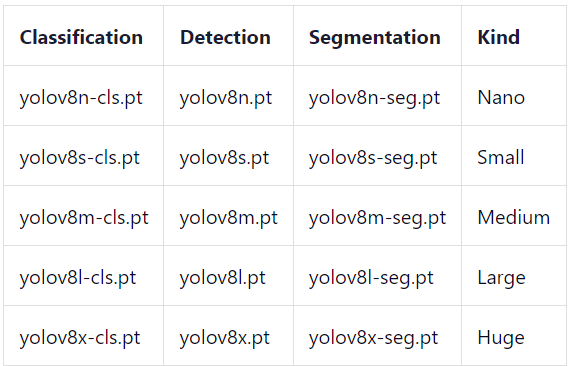

# Fetch image 

In [4]:
%pip install pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
from PIL import Image

In [7]:
url = "pet.jpg"
img = Image.open(url)
img

FileNotFoundError: [Errno 2] No such file or directory: 'spet.jpg'

In [ ]:
width, height = img.size
width, height

# Predict Image

In [ ]:
results = model.predict(url)

In [ ]:
result = results[0]

#### The result contains detected objects and convenient properties to work with them. The most important one is the boxes array with information about detected bounding boxes on the image. You can determine how many objects it detected by running the len function

In [ ]:
len(result.boxes)

In [ ]:
result.boxes

#### <li> xyxy – the coordinates of the box as an array [x0,y0,x1,y1] </li>
#### <li> cls – the ID of object type </li>
#### <li> conf – the confidence level of the model about this object </li>

In [ ]:
print("Object type:", result.boxes.cls)
print("Coordinates:", result.boxes.xyxy)
print("Probability:", result.boxes.conf)

#### the PyTorch models are encoded as an array of PyTorch Tensor objects, so you need to extract the first item from each of these arrays

## Example: first class from Object type

In [ ]:
print("Object type:", result.boxes.cls[0])
print("Coordinates:", result.boxes.xyxy[0])
print("Probability:", result.boxes.conf[0])

#### <li>To unpack actual values from Tensor, you need to use the .tolist() method for tensors with array</li>
#### <li> o unpack actual values from Tensor, you need to use the .item() method  </li>

In [ ]:
cords =result.boxes.xyxy[0].tolist()
class_id =result.boxes.cls[0].item()
conf = result.boxes.conf[0].item()

print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

## The object type is 15 here. What does this mean?

### you can find that 15 is "cat"

In [ ]:
result.names[15]

In [ ]:
cords =result.boxes.xyxy[0].tolist()
class_id =result.boxes.cls[0].item()
conf = result.boxes.conf[0].item()

print("Object type:", result.names[class_id]) # Change Index to class_id istead of 15
print("Coordinates:", cords)

print("Probability:", conf)

# Show All of images that detected

In [ ]:
for box in result.boxes:
    cords =box.xyxy[0].tolist()
    class_id =box.cls[0].item()
    conf = box.conf[0].item()
    
    print("Object type:",result.names[class_id],"(",class_id,")")
    print("Coordinates:", [round(cord,2) for cord in cords])
    print("Probability:", round(conf,2))
    print("------------------")

In [ ]:
import cv2
import numpy as np

In [ ]:
image = np.array(img) # convert image to array
for box in result.boxes:
    cords =box.xyxy[0].tolist()
    class_id =box.cls[0].item()
    conf = box.conf[0].item()
    
    start = (int(cords[0]),int(cords[1])) # x0, y0
    end   = (int(cords[2]),int(cords[3])) # x1, y1

    cv2.rectangle(image,start,end,(0,200,0),thickness=2)
    cv2.putText(image, result.names[class_id], (start[0]+15,start[1]+30), cv2.FONT_HERSHEY_SIMPLEX,0.9, (10,0,10), 2)# show detection objects on image

In [ ]:
Image.fromarray(image)